In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MCMC

import itertools
import numpy.linalg

# Functions

Model : $\mathcal{H} = -\frac{1}{2} \sum_{ij} s_i J_{ij} s_j - \sum_i h_i s_i$
1D chain of length N with periodic bcs : $s_N = s_0$


In [2]:
def generate_J(N, j=1):
    J = np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)
    J[0,-1] = 1
    J[-1,0] = 1

    for i in range(N):
        if i < N/2:
            J[i,i] = 1
        else : 
            J[i,i] = -1
    
    return j*J
    
def generate_h(N, h=1):
    return h*np.ones( N )



def energy(sample):
    return -0.5 * sample.T @ J_matrix @sample - h_matrix.T @ sample

### Analytical solutions for : 
- Partition function $Z$
- Magnetization $M = \frac{1}{N} \sum_i \langle s_i \rangle$
- Correlation $\langle s_i s_j \rangle$

In [3]:
def partition_function():
    b = np.exp(beta*J)*np.cosh(beta*h)
    sq = np.sqrt( np.exp(2*beta*J)*np.sinh(beta*h)**2 + np.exp(-2*beta*J) )
    
    l1 = b + sq
    l2 = b - sq
    
    return l1**N + l2**N


def magn():
    b = np.exp(beta*J)*np.cosh(beta*h)
    sq = np.sqrt( np.exp(2*beta*J)*np.sinh(beta*h)**2 + np.exp(-2*beta*J) )
    
    l1 = b + sq
    l2 = b - sq
    
    Z = l1**N + l2**N
    
    db = np.exp(beta*J)*np.sinh(beta*h)
    
    m = (db + 1/sq *np.exp(2*beta*J)*np.sinh(beta*h)*np.cosh(beta*h) ) * l1**(N-1)
    m+= (db - 1/sq *np.exp(2*beta*J)*np.sinh(beta*h)*np.cosh(beta*h) ) * l2**(N-1)
    
    return m/Z

'''
# Seems false
def magn():
    b = np.exp(beta*J)*np.cosh(beta*h)
    sq = np.sqrt( np.exp(2*beta*J)*np.sinh(beta*h)**2 + np.exp(-2*beta*J) )
    
    l1 = b + sq
    l2 = b - sq
    
    Z = l1**N + l2**N
    
    m = l1**N * (-np.exp(beta*J) + np.exp(2*beta*h + beta*J) - 2*np.exp(beta*h)*sq)
    m+= l2**N * (-np.exp(beta*J) + np.exp(2*beta*h + beta*J) + 2*np.exp(beta*h)*sq)
    
    m*= -np.exp(3*beta*J-2*beta*h)*(1-np.exp(2*beta*h))/2/(1+np.exp(2*beta*J)*(np.exp(beta*h+beta*J)-np.exp(beta*J)*np.cosh(beta*h)+sq)**2) / Z
    return m
'''  
    
'''  
# Seems false
def discrete_magnetization(i):
    Z = partition_function()
    s_tuples = np.array(list(k for k in itertools.product( [1.0, -1.0], repeat=N)))
    m = 0
    for s in s_tuples:
        m += s[i] * np.exp(-beta*energy(s))
        
    return m/Z
'''

def correlation(i,j):
    b = np.exp(beta*J)*np.cosh(beta*h)
    sq = np.sqrt( np.exp(2*beta*J)*np.sinh(beta*h)**2 + np.exp(-2*beta*J) )
    
    l1 = b + sq
    l2 = b - sq
    
    m = (l1**N + l2**N)*(l1 + l2 -2*np.exp(beta*h+beta*J))**2
    m+= (l1**(N-i+j) * l2**(i-j) + l2**(N-i+j) * l1**(i-j)) * (2*l1 - 2*np.exp(beta*h+beta*J)) * (2*np.exp(beta*h+beta*J) - 2*l2)
    m/= (l1 - l2)**2
    
    return m/(l1**N + l2**N)

'''
# Test wether m(h) has the right shape
J = 1
h = -0.2
print(magn())
print(magn_derivative())
print(discrete_magnetization(5))

x = np.linspace(-2, 2, 100)
m1 = np.zeros(100)
m2 = np.zeros(100)
m3 = np.zeros(100)

for k in range(100):
    J = x[k]
    m1[k] = magn()
    m2[k] = magn_derivative()
    m3[k] = discrete_magnetization(4)

plt.figure()
#plt.plot(x, m1) # no
plt.plot(x, m2)
#plt.plot(x, m3) # no
plt.legend(range(3))
plt.show()
'''

'\n# Test wether m(h) has the right shape\nJ = 1\nh = -0.2\nprint(magn())\nprint(magn_derivative())\nprint(discrete_magnetization(5))\n\nx = np.linspace(-2, 2, 100)\nm1 = np.zeros(100)\nm2 = np.zeros(100)\nm3 = np.zeros(100)\n\nfor k in range(100):\n    J = x[k]\n    m1[k] = magn()\n    m2[k] = magn_derivative()\n    m3[k] = discrete_magnetization(4)\n\nplt.figure()\n#plt.plot(x, m1) # no\nplt.plot(x, m2)\n#plt.plot(x, m3) # no\nplt.legend(range(3))\nplt.show()\n'

In [4]:
# Log of the unnormalized probability distribution in Eq. (4)

def log_prob(phi):
    '''
    phi : vector at evaluation
    '''
    
    # Exponential part
    p = -0.5*beta * phi.T @ J_matrix @ phi
    
    #a = beta*h_matrix + beta*J_matrix@phi
    #p += np.sum( np.abs(a) + np.log1p(np.exp(-2*np.abs(a))) )
    
    '''
    for i in range(N):
        p += np.log(np.cosh( beta*h_matrix[i] + beta*J_matrix[i]@phi ))
    '''
    
    # Product of i part
    p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
    
        
    return p
    


# MCMC

In [7]:
1/300/8.617e-5

38.68322308614754

In [19]:
N = 6
J = 0.5
h = -1

beta = 5

J_matrix = generate_J(N, J)
h_matrix = generate_h(N, h)


phi0 = np.random.normal(-10, 5, size=N)

n_MCMC = 15000
sampler = MCMC.Continuous(std = 1)
list_samples = sampler.run(phi0, log_prob, n_MCMC)

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_1968/4117475232.py:20: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.05486666666666667


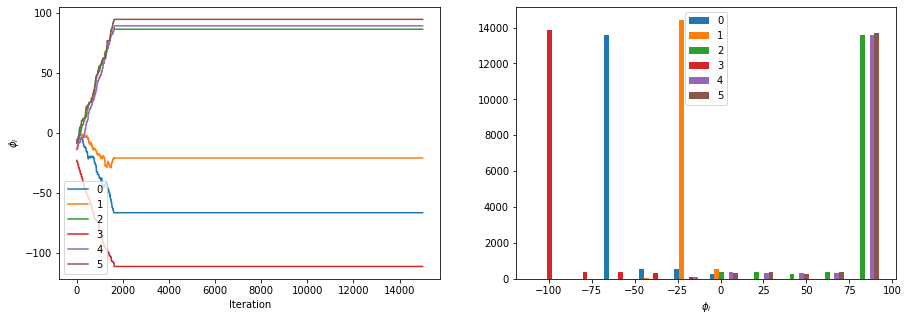

In [20]:
fig = plt.figure(figsize=(15,5))

# Should show the "convergence" of the MCMC
ax1 = fig.add_subplot(121)
ax1.plot(list_samples[:])
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\phi_i$')
ax1.legend(range(N))


# Should show the wished probability distribution (addition of two gaussians for each component)
ax2 = fig.add_subplot(122)
ax2.hist(list_samples)
ax2.set_xlabel('$\phi_i$')
ax2.legend(range(N))


plt.show()

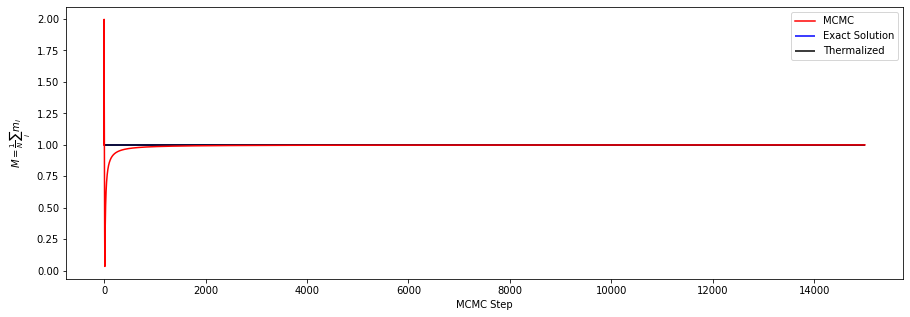

Theoretical : 0.9999999958773185
Obtained : 1.0


In [21]:
i = 3

# Compute evolution of the magnetization without burning period
m = np.zeros(n_MCMC)
for k in range(n_MCMC):
    m[k:] += np.tanh(beta*h_matrix[i] + beta*J_matrix[i]@list_samples[k])
    if k != 0:
        m[k] /=  k
    

# Magnetization with burning period   
m_burnt = np.mean( np.tanh(beta*h_matrix[i] + beta*J_matrix[i]@list_samples[100:].T), axis=0 )

# Analytical solution of the magnetization
m_th = magn()


# Compare
plt.figure(figsize=(15,5))
plt.hlines(np.abs(m_th), 0, n_MCMC, label='Exact Solution', color='b')
plt.plot(np.abs(m), label='MCMC', color='r')
plt.hlines(np.abs(m_burnt), 0, n_MCMC, label='Thermalized', color='k')
plt.ylabel(r'$M = \frac{1}{N} \sum_i m_i$')
plt.xlabel('MCMC Step')
#plt.ylim([0.9*np.abs(m_burnt), 1.1*np.abs(m_burnt)])
plt.legend()



plt.show()


print(f'Theoretical : {np.abs(m_th)}')
print(f'Obtained : {np.abs(m_burnt)}')

In [ ]:
i = 5
j = 2


corr = np.zeros(n_MCMC)
for k in range(n_MCMC):
    corr[k:] += np.tanh(beta*h_matrix[i] + beta*J_matrix[i]@list_samples[k]) * np.tanh(beta*h_matrix[j] + beta*J_matrix[j]@list_samples[k])
    corr[k] /=  k

        
c_burnt = np.mean( np.tanh(beta*h_matrix[i] + beta*J_matrix[i]@list_samples[10000:].T)*np.tanh(beta*h_matrix[j] + beta*J_matrix[j]@list_samples[10000:].T), axis=0 )
c_th = correlation(i,j)

plt.figure(figsize=(15,5))
plt.hlines(c_th, 0, n_MCMC, label='Exact Solution', color='b')
plt.plot(corr, label='MCMC', color='r')
plt.hlines(c_burnt, 0, n_MCMC, label='Thermalized', color='k')
plt.xlabel('Spin $i$')
plt.ylabel('MCMC Step')
#plt.ylim([0.9*np.abs(m_burnt), 1.1*np.abs(m_burnt)])
plt.legend()



plt.show()


print(c_burnt)
print(c_th)

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.043333333333333335


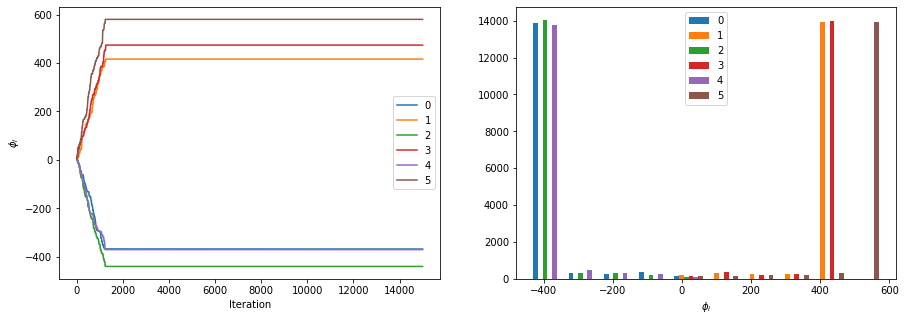

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.048


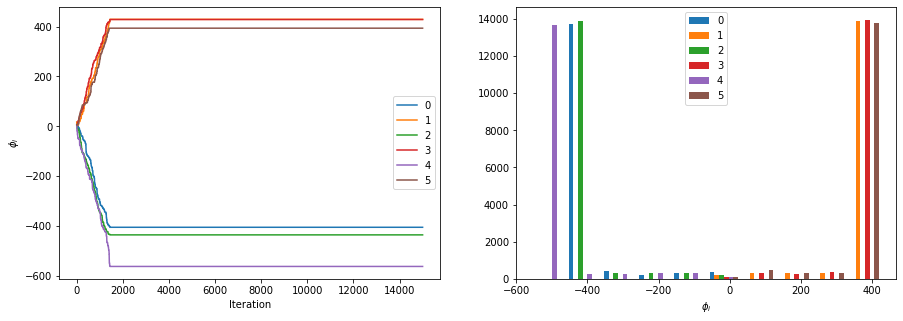

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.04733333333333333


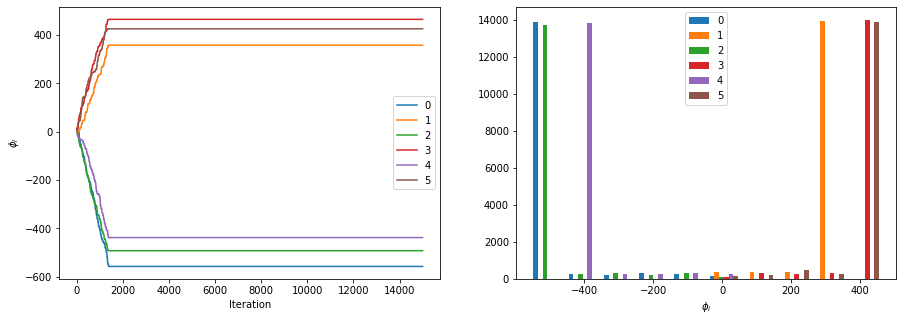

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.04886666666666667


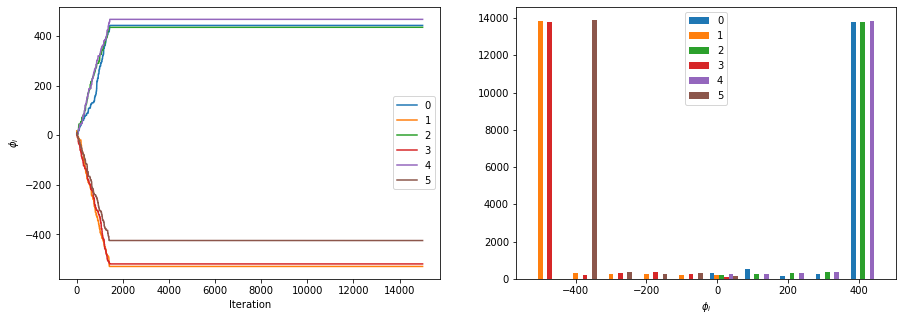

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.0504


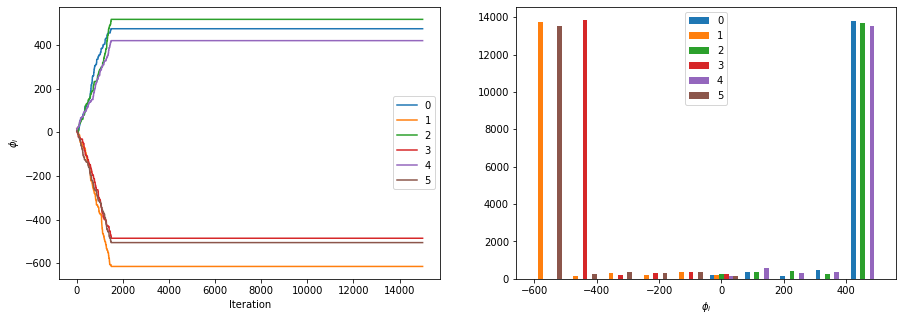

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.046533333333333336


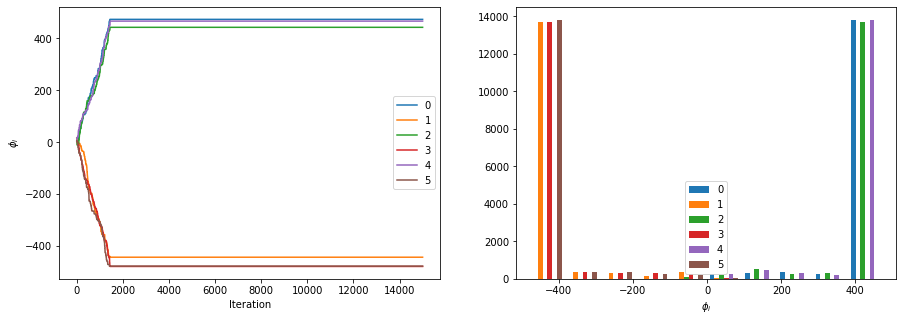

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.043866666666666665


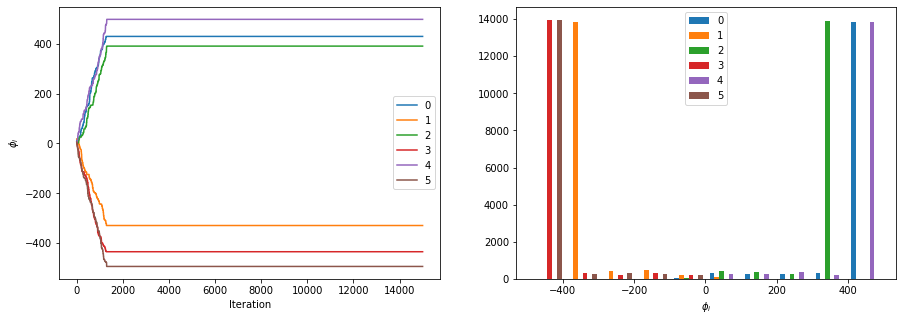

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.043333333333333335


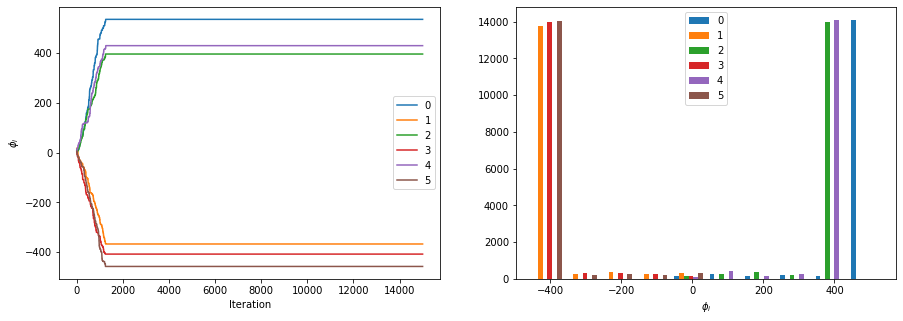

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.044


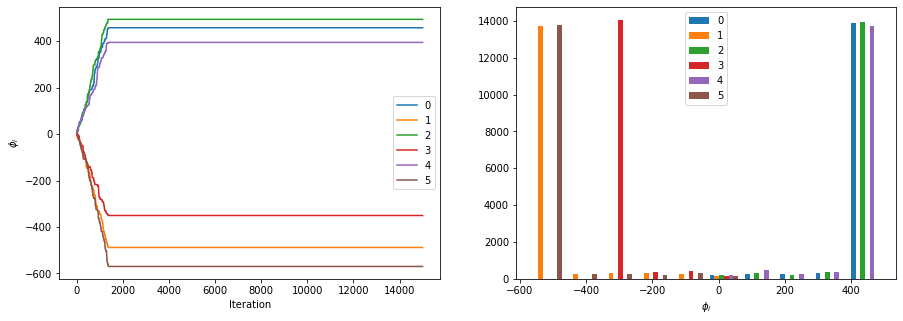

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.0466


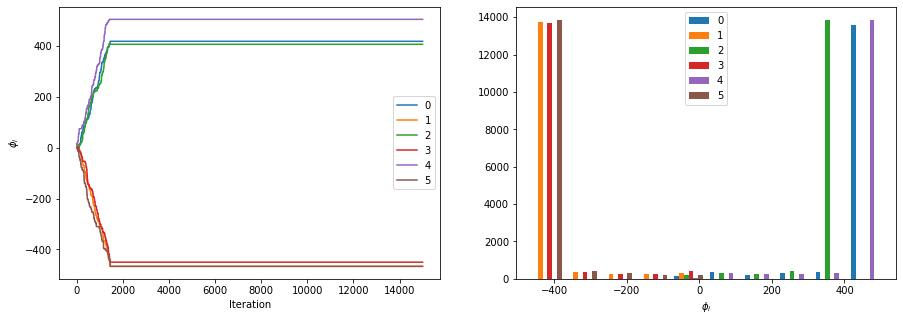

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.045066666666666665


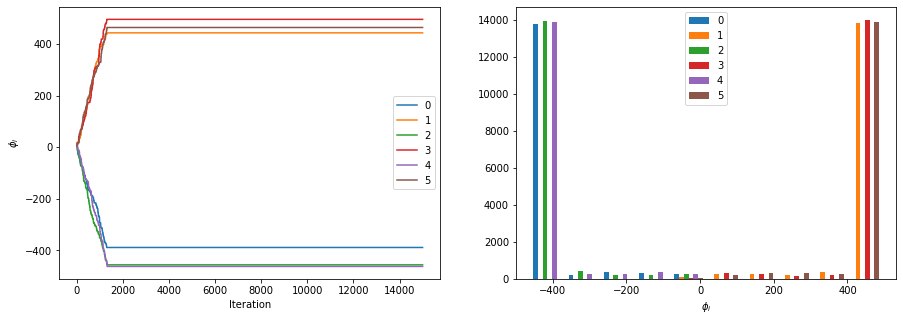

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.0446


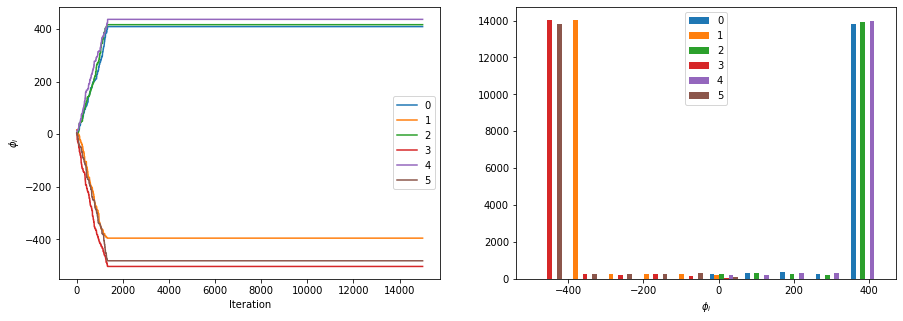

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.046066666666666665


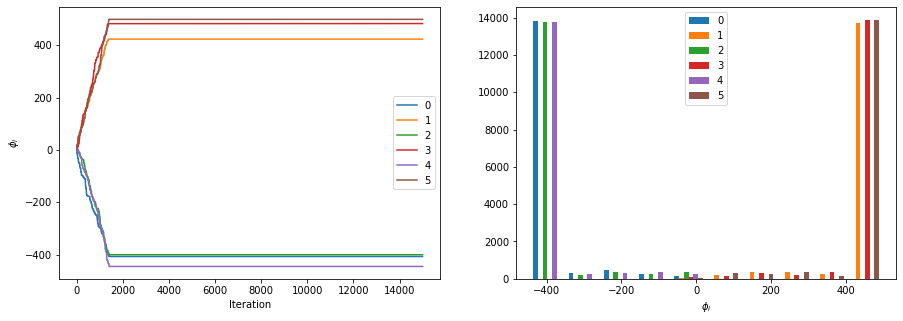

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.047733333333333336


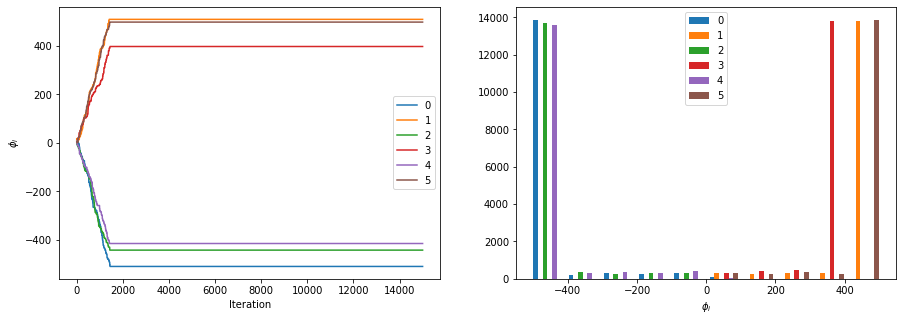

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.045066666666666665


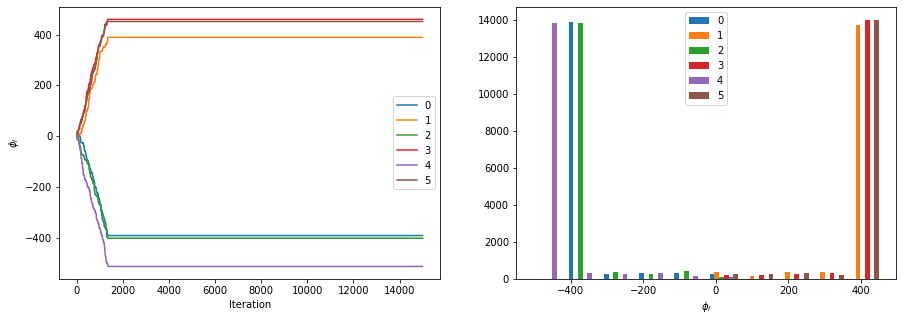

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.0458


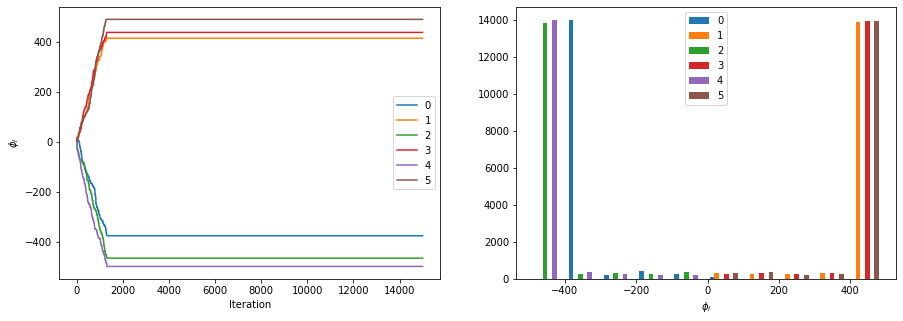

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.0456


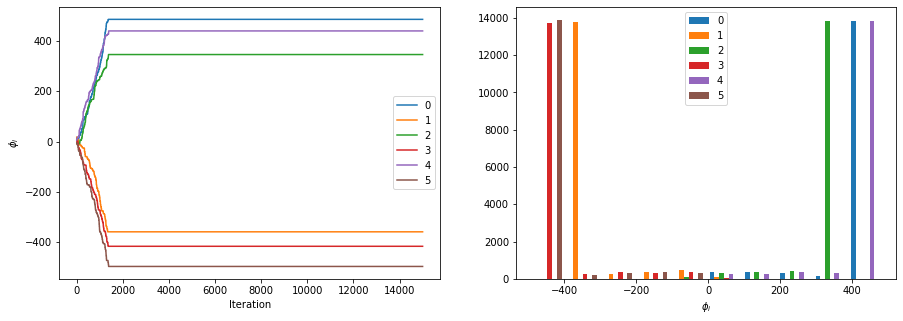

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.0458


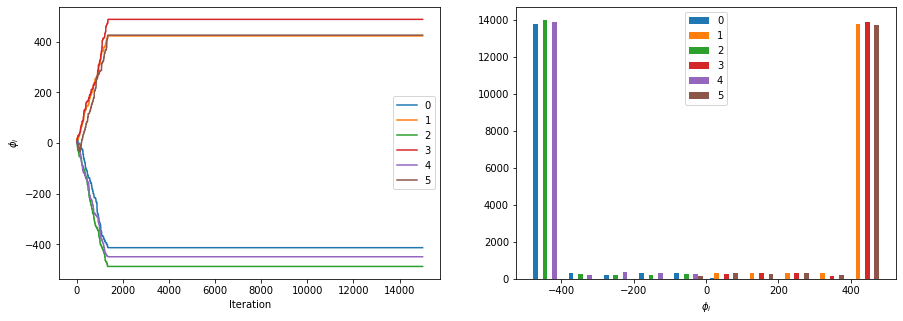

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.048266666666666666


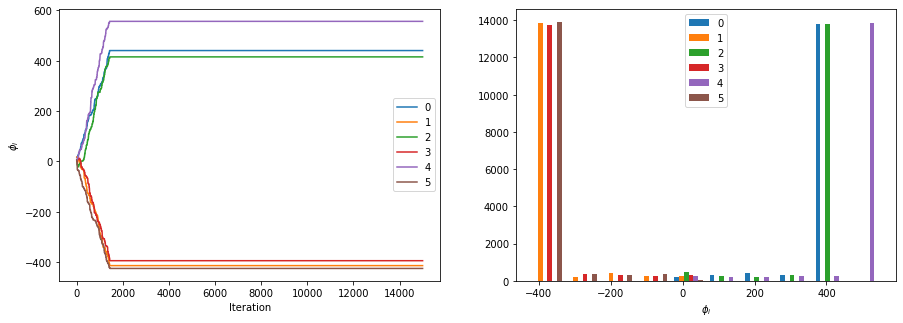

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.046533333333333336


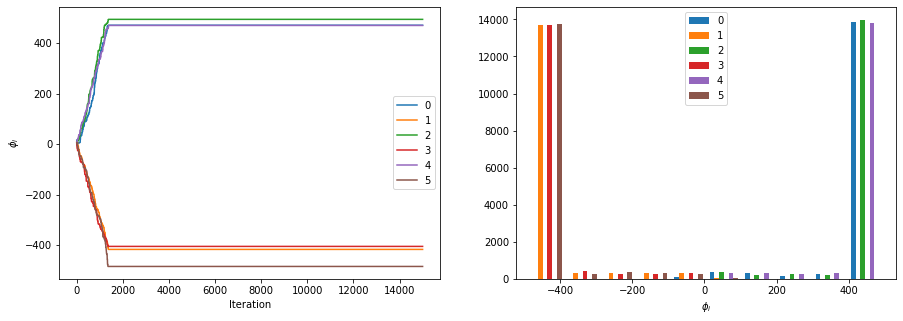

C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: overflow encountered in exp
  R = np.exp(log_prob(new_sample) - log_prob(sample))
C:\Users\nutel\AppData\Local\Temp/ipykernel_16496/4071394731.py:14: RuntimeWarning: overflow encountered in cosh
  p += np.sum( np.log(np.cosh(beta*h_matrix + beta*J_matrix@phi)) )
C:\Users\nutel\Documents\Cours\Master\TP-IV\MCMC.py:104: RuntimeWarning: invalid value encountered in double_scalars
  R = np.exp(log_prob(new_sample) - log_prob(sample))


Acceptance rate : 0.04493333333333333


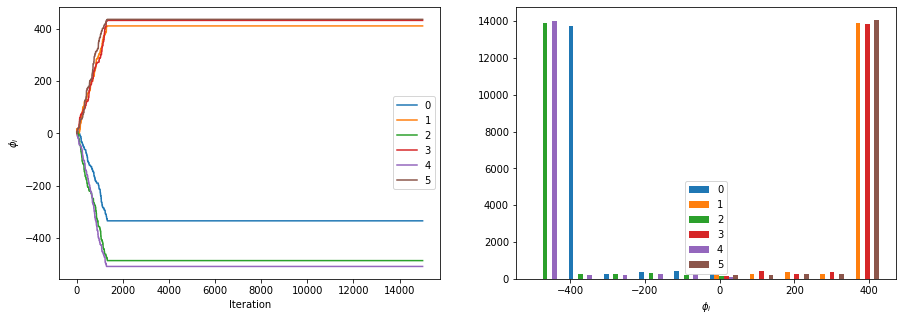

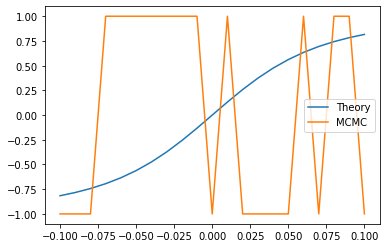

In [56]:
h_array = np.linspace(-0.1, 0.1, 21)
i=3
m_burnt = np.zeros(21)
m_th = np.zeros(21)
for k in range(h_array.size):
    h = h_array[k]
    h_matrix = generate_h(N, h)
    list_samples = sampler.run(phi0, log_prob, n_MCMC)
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121)
    ax1.plot(list_samples[:])
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('$\phi_i$')
    ax1.legend(range(N))


    ax2 = fig.add_subplot(122)
    ax2.hist(list_samples)
    ax2.set_xlabel('$\phi_i$')
    ax2.legend(range(N))


    plt.show()
    
    m_burnt[k] = np.mean( np.tanh(beta*h_matrix[i] + beta*J_matrix[i]@list_samples[100:].T), axis=0 )
    m_th[k] = magn()
    
plt.figure()
plt.plot(h_array, m_th, label='Theory')
plt.plot(h_array, m_burnt, label='MCMC')
plt.legend()
plt.show()